## Atividade Aula 3



In [26]:
import pandas as pd

# 1. Define the corrected URL for the student_exam_data_new.csv file
url = "https://raw.githubusercontent.com/Carolqsousa/RNA-e-Deep-Learning---CESAR-School-2025.01/main/Atividade%20Aula%203/student_exam_data_new.csv"

# 2. Use pandas.read_csv() to load the data from the URL into a DataFrame
df = pd.read_csv(url)

# 3. Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# 4. Display a summary of the DataFrame's structure
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


## EDA





Missing values per column:
Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

Descriptive statistics for numerical columns:
       Study Hours  Previous Exam Score
count   500.000000           500.000000
mean      5.487055            68.917084
std       2.688196            17.129607
min       1.045554            40.277921
25%       3.171517            53.745955
50%       5.618474            68.309294
75%       7.805124            83.580209
max       9.936683            99.983060


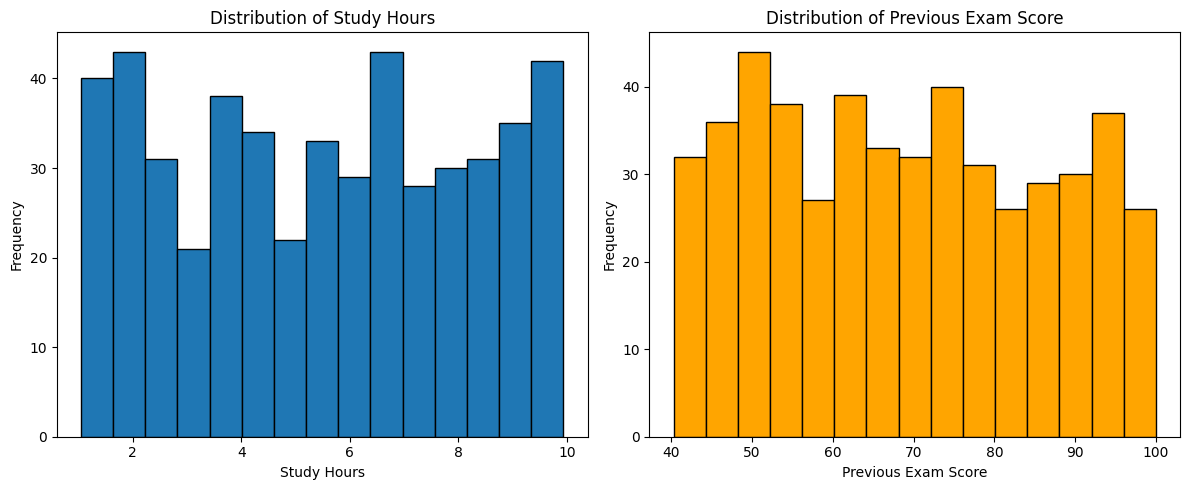


Value counts for 'Pass/Fail' column:
Pass/Fail
0    316
1    184
Name: count, dtype: int64

Features (X) head:
   Study Hours  Previous Exam Score
0     4.370861            81.889703
1     9.556429            72.165782
2     7.587945            58.571657
3     6.387926            88.827701
4     2.404168            81.083870

Target (y) head:
0    0
1    1
2    0
3    1
4    0
Name: Pass/Fail, dtype: int64


In [27]:
import matplotlib.pyplot as plt

# 1. Display the number of missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

# 2. Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df[['Study Hours', 'Previous Exam Score']].describe())

# 3. Plot histograms for 'Study Hours' and 'Previous Exam Score'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Study Hours'], bins=15, edgecolor='black')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Previous Exam Score'], bins=15, edgecolor='black', color='orange')
plt.title('Distribution of Previous Exam Score')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Display value counts for the 'Pass/Fail' column
print("\nValue counts for 'Pass/Fail' column:")
print(df['Pass/Fail'].value_counts())

# 5. Separate features (X) and target (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

print("\nFeatures (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

## Preparando para  PyTorch




In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# 2. Split the features X and target y into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize a StandardScaler
scaler = StandardScaler()

# 4. Fit the StandardScaler on the training features (X_train) and then transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Convert the scaled training features (X_train_scaled) to a PyTorch FloatTensor and the training target (y_train) to a PyTorch LongTensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values) # .values to convert pandas Series to numpy array first

# 6. Convert the scaled validation features (X_test_scaled) to a PyTorch FloatTensor and the validation target (y_test) to a PyTorch LongTensor
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values) # .values to convert pandas Series to numpy array first

# 7. Print the shapes of X_train_tensor, y_train_tensor, X_test_tensor, and y_test_tensor
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)


Shape of X_train_tensor: torch.Size([400, 2])
Shape of y_train_tensor: torch.Size([400])
Shape of X_test_tensor: torch.Size([100, 2])
Shape of y_test_tensor: torch.Size([100])


## Adaptando o Modelo de Rede Neural





In [29]:
import torch.nn as nn

# 1. Determine the number of input features
input_features = X_train_tensor.shape[1]

# 2. Determine the number of output classes (binary classification: 0 or 1)
output_classes = 2 # For binary classification (Pass/Fail)

# 3. Instantiate a new nn.Linear model
model = nn.Linear(input_features, output_classes)

# 4. Print the state_dict() of the newly created model
print("Model state_dict() after instantiation:")
print(model.state_dict())


Model state_dict() after instantiation:
OrderedDict({'weight': tensor([[ 0.2042, -0.4820],
        [-0.2111,  0.5782]]), 'bias': tensor([-0.1618,  0.4839])})


##Loss Function and Optimizer




In [30]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

## Loop de treianmento



In [31]:
nb_epoch = 1000

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_train_tensor)

    # calcula a perda
    loss = criterion(output, y_train_tensor)

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())
    final_loss = loss.data.item()

print('Final loss:', final_loss)

Final loss: 0.25533604621887207


## Avaliação do modelo




In [32]:
import pandas as pd

# 1. Use the trained model to make predictions on the X_test_tensor
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for inference
    outputs = model(X_test_tensor)

# 2. Convert the model's output (logits) to predicted class labels
_, y_pred = torch.max(outputs, 1)

# 3. Calculate the accuracy of the predictions
accuracy = (y_pred == y_test_tensor).sum().item() / len(y_test_tensor)

# 4. Print the calculated test accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# 5. Generate and display a confusion matrix
print('\nConfusion Matrix:')
confusion_matrix = pd.crosstab(y_pred.numpy(), y_test_tensor.numpy(),
                               rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Test Accuracy: 0.8500

Confusion Matrix:
Actual      0   1
Predicted        
0          57   8
1           7  28


## Savando Parametros




In [34]:
import torch

# Define a file path to save the model parameters
model_path = 'model_parameters.pth'

# 1. Save the model's state_dict
torch.save(model.state_dict(), model_path)
print(f'Model parameters saved to {model_path}')

# 2. To load the model parameters, you would first need to instantiate the model
#    with the same architecture.
#    For demonstration, let's create a new instance of the model

# Instantiate a new nn.Linear model with the same input_features and output_classes
loaded_model = nn.Linear(input_features, output_classes)

# Load the saved state_dict into the new model instance
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval() # Set the loaded model to evaluation mode

print(f'Model parameters loaded from {model_path}')

# You can verify that the loaded model's state_dict is the same as the original model's
# For example, print a part of the weights from both models to compare
# print('\nOriginal model weights (first row):', model.state_dict()['weight'][0])
# print('Loaded model weights (first row):', loaded_model.state_dict()['weight'][0])

Model parameters saved to model_parameters.pth
Model parameters loaded from model_parameters.pth


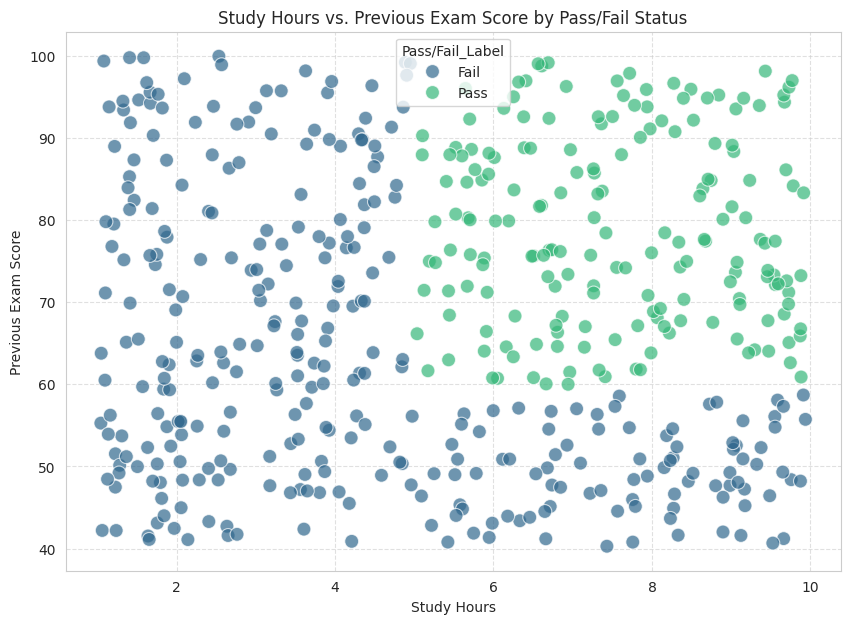

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 7))

# Create a temporary column with string labels for 'Pass/Fail' for clearer legend
df_plot = df.copy()
df_plot['Pass/Fail_Label'] = df_plot['Pass/Fail'].map({0: 'Fail', 1: 'Pass'})

# Scatter plot of 'Study Hours' vs 'Previous Exam Score', colored by 'Pass/Fail_Label'
sns.scatterplot(
    data=df_plot,
    x='Study Hours',
    y='Previous Exam Score',
    hue='Pass/Fail_Label', # Use the new column for hue
    palette='viridis', # Choose a color palette
    s=100, # Size of the points
    alpha=0.7 # Transparency of the points
)

plt.title('Study Hours vs. Previous Exam Score by Pass/Fail Status')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
# Let seaborn handle the legend automatically based on 'hue'
# The legend will now show 'Fail' and 'Pass' with distinct colors
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##Conclusões Principais da Análise de Dados

O conjunto de dados student_exam_data_new.csv, carregado com sucesso, contém 500 entradas e 3 colunas: Study Hours (horas de estudo), Previous Exam Score (pontuação do exame anterior) e Pass/Fail (aprovação/reprovação). Não há dados ausentes.

As estatísticas descritivas mostram que Study Hours varia de aproximadamente 1.05 a 9.94 (média: 5.49, desvio padrão: 2.69) e Previous Exam Score varia de 40.28 a 99.98 (média: 68.92, desvio padrão: 17.13).

A variável alvo, Pass/Fail, apresenta um desequilíbrio: 316 instâncias para 'Reprovado' (0) e 184 instâncias para 'Aprovado' (1).

Após o pré-processamento, os dados foram divididos em conjuntos de treinamento (400 amostras) e teste (100 amostras). As características numéricas foram padronizadas e todos os dados foram convertidos para tensores PyTorch.
Um modelo nn.Linear foi adaptado com 2 características de entrada e 2 classes de saída (para classificação binária).

O modelo foi treinado por 1000 épocas usando Descida de Gradiente Estocástica (SGD) com taxa de aprendizado de 0.15 e CrossEntropyLoss como função de perda, atingindo uma perda final de treinamento de aproximadamente 0.255.
No conjunto de teste, o modelo alcançou uma acurácia de 0.8500 (85%).

A matriz de confusão indica:

57 Verdadeiros Negativos (previu 'Reprovado' corretamente)

28 Verdadeiros Positivos (previu 'Aprovado' corretamente)

7 Falsos Positivos (previu 'Aprovado' incorretamente quando era 'Reprovado')

8 Falsos Negativos (previu 'Reprovado' incorretamente quando era 'Aprovado')


Percepções

O modelo apresenta um desempenho razoável com 85% de acurácia em dados não vistos. No entanto, o desequilíbrio de classes na variável alvo (Pass/Fail) pode estar impactando o desempenho do modelo, especialmente para a classe 'Aprovado'.
